In [ ]:
import numpy as np
from collections import Counter
from scipy.spatial import distance
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
def distance(x1,x2,p,degree=3):
       if(p == "euclidean"):
           dis = np.linalg.norm(x1-x2,axis = 0)
           return dis
       if(p == "manhattan"):
           dis = np.sum(np.abs(x1-x2),axis = 0)
           return dis
       if(p == "minkowski"):
           return np.sum(np.abs(x1-x2)**degree,axis = 0)**(1/degree)
       if(p == "cosine"):
           return 1-np.dot(x1,x2)/(np.linalg.norm(x1)*np.linalg.norm(x2))
       if(p == "hamming"):
           return np.sum(x1!=x2,axis = 0)

In [ ]:
#task 1 :Binary Classifier KNN
class KNN:
    def __init__(self,k,p,degree=3):
      self.k = k
      self.p = p
      self.degree = degree
    def fit(self,X,y):
        self.X_train = X
        self.y_train = y

    def predict(self,X):
      predictions = [self._predict(x) for x in X]
      return predictions
    def _predict(self,x):
      #distance
      distances = [distance(x,x_train,self.p,self.degree) for x_train in X_train]

      #k closest
      k_indices = np.argsort(distances)[:self.k]
      k_nearest_labels = [self.y_train[i] for i in k_indices]
      # majority vote
      most_common = Counter(k_nearest_labels).most_common()
      return most_common[0][0]


In [ ]:
from google.colab import files
import pandas as pd
df = pd.read_csv('dlas1.csv')

In [ ]:
#labels
labels = df["diagnosis"].values
#features values
features = df.iloc[0:,2:].values

In [ ]:
print(labels)

['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'M'
 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'M'
 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M'
 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B

In [ ]:
print(features)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [ ]:
#splitting the data set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [ ]:
print(X_train)
print(X_train.shape)

[[9.029e+00 1.733e+01 5.879e+01 ... 1.750e-01 4.228e-01 1.175e-01]
 [2.109e+01 2.657e+01 1.427e+02 ... 2.903e-01 4.098e-01 1.284e-01]
 [9.173e+00 1.386e+01 5.920e+01 ... 5.087e-02 3.282e-01 8.490e-02]
 ...
 [1.429e+01 1.682e+01 9.030e+01 ... 3.333e-02 2.458e-01 6.120e-02]
 [1.398e+01 1.962e+01 9.112e+01 ... 1.827e-01 3.179e-01 1.055e-01]
 [1.218e+01 2.052e+01 7.722e+01 ... 7.431e-02 2.694e-01 6.878e-02]]
(455, 30)


In [ ]:
print(y_train.shape)

(455,)


In [ ]:
labels_new = []

for i in predictions:
    if(i == "M"):
        labels_new.append(1)
    else:
        labels_new.append(0)

In [ ]:
print(y_test)

['B' 'M' 'M' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'B'
 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B'
 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B'
 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M'
 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M'
 'B' 'B' 'M' 'B' 'B' 'M']


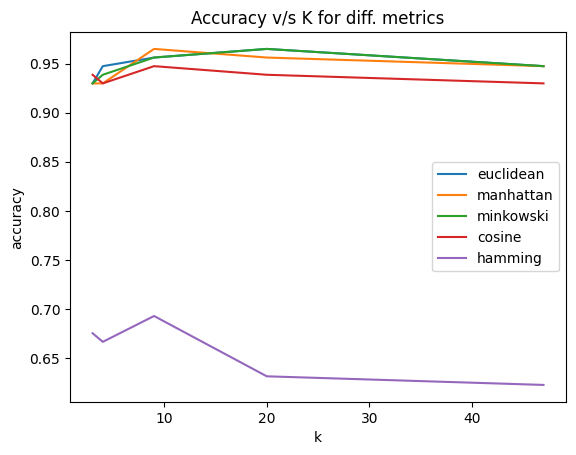

most accurate combination:
acc =  96.49122807017544 %
k =  20
distance =  euclidean


In [ ]:
dis = ["euclidean","manhattan","minkowski","cosine","hamming"]
range = [3,4,9,20,47]
max_k = 0
max_acc = 0
max_dis =""
for d in dis:
    res = []
    for k in range:
       model = KNN(k,d)
       model.fit(X_train,y_train)
       predictions = model.predict(X_test)
       acc = np.sum(predictions == y_test) / len(y_test)
       if(acc>max_acc):
           max_acc = acc
           max_k = k
           max_dis = d
       res.append(acc)
    plt.plot(range,res,label=d)
    plt.legend()
    plt.xlabel('k')
    plt.ylabel('accuracy')
    plt.title('Accuracy v/s K for diff. metrics')
plt.show()
print("most accurate combination:")
print("acc = ",max_acc*100,'%')
print("k = ",max_k)
print("distance = ",max_dis)

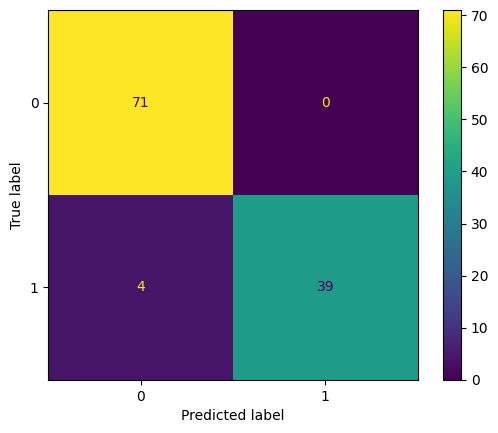

In [ ]:
model = KNN(max_k,max_dis)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
#precision = tp/tp+fp
#recall = tp/tp+fn
tp = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
tn = cm[1][1]
precision = tp/(tp+fp)
recall = tp/(tp+fn)
print("precision = ",precision)
print("recall = ",recall)

precision =  1.0
recall =  0.9466666666666667


In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(n_components=2,random_state = 42 ,verbose = 2,n_iter = 50000)
X_tsne = tsne.fit_transform(X_test)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 114 samples in 0.001s...
[t-SNE] Computed neighbors for 114 samples in 0.066s...
[t-SNE] Computed conditional probabilities for sample 114 / 114
[t-SNE] Mean sigma: 116.079757
[t-SNE] Computed conditional probabilities in 0.020s
[t-SNE] Iteration 50: error = 44.9110603, gradient norm = 0.4012793 (50 iterations in 0.029s)
[t-SNE] Iteration 100: error = 45.2041893, gradient norm = 0.3302787 (50 iterations in 0.038s)
[t-SNE] Iteration 150: error = 44.4597435, gradient norm = 0.4422423 (50 iterations in 0.033s)
[t-SNE] Iteration 200: error = 47.7196770, gradient norm = 0.4572850 (50 iterations in 0.029s)
[t-SNE] Iteration 250: error = 45.6880722, gradient norm = 0.3835039 (50 iterations in 0.030s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.688072
[t-SNE] Iteration 300: error = 0.0606839, gradient norm = 0.0017280 (50 iterations in 0.030s)
[t-SNE] Iteration 350: error = 0.0578549, gradient norm = 0.0002220

In [ ]:
X_tsne.shape

(114, 2)

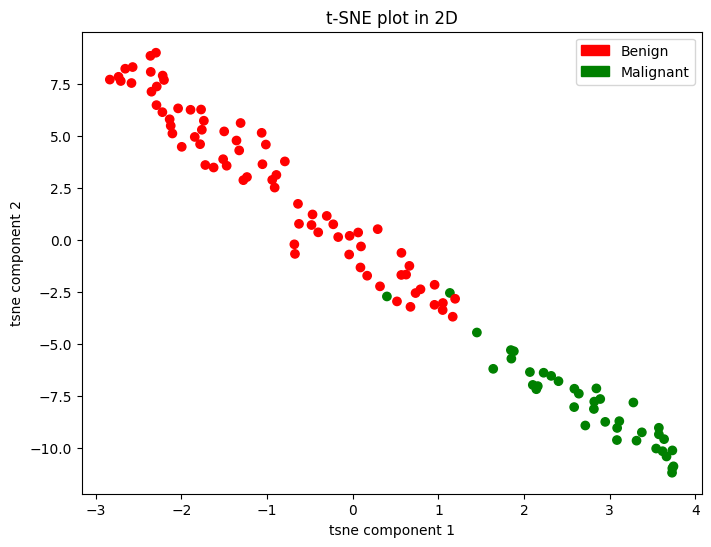

In [ ]:
import matplotlib.colors as mcolors


# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(X_tsne[:,0],X_tsne[:,1], c=labels_new, cmap=mcolors.ListedColormap(['red', 'green']))

# Aesthetics
plt.title('t-SNE plot in 2D')
plt.xlabel('tsne component 1')
plt.ylabel('tsne component 2')

import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='Benign')
green_patch = mpatches.Patch(color='green', label='Malignant')
plt.legend(handles=[red_patch, green_patch])
plt.show()